In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import statsmodels
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
%matplotlib inline
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
import numpy.random

%autocall

Automatic calling is: Smart


In [229]:
# sinal moificado para o tamanho da série temporal de temp global média(1644):
t  = np.linspace(0, 240,1644)

In [230]:
sinal = .2*np.exp(t/100) + np.sin(2*np.pi*t/3.) + .8 * np.sin(2*np.pi*t/45.)  + 6 * numpy.random.random(size=1644) 

In [231]:
sinal

array([4.69342704, 3.56045264, 6.61687395, ..., 7.8647309 , 5.95400574,
       4.41899348])

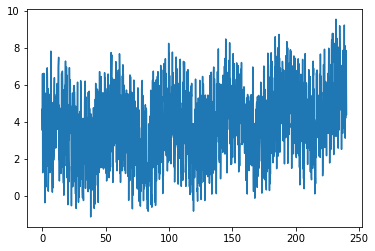

In [232]:
plt.plot(t,sinal)

[]

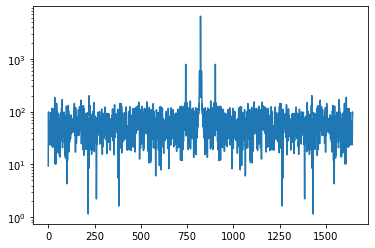

In [233]:
f = np.fft.fftfreq(1000)
plt.plot(abs( np.fft.fftshift( np.fft.fft(sinal)) ) )
plt.semilogy()

In [234]:
# Carregando os dados:
df=pd.read_csv('global_temp_monthly.csv')

# Carregando os dados:

df_temp=df.dropna()
df_temp= df_temp.set_index(['Date'])

df_temp.index = pd.to_datetime(df_temp.index, format='%Y-%m')
df_temp = df_temp[['Mean']].groupby('Date').sum()
df_temp.rename(columns={'Mean': 'Temperature'}, inplace = True)

df_temp.head(10)


,Temperature
Date,
1880-01-01,-0.2991
1880-02-01,-0.3329
1880-03-01,-0.3157
1880-04-01,-0.3199
1880-05-01,-0.2138
1880-06-01,-0.4592
1880-07-01,-0.3891
1880-08-01,-0.1525
1880-09-01,-0.2517


In [235]:
df_temp.describe()
df_temp

,Temperature
Date,
1880-01-01,-0.2991
1880-02-01,-0.3329
1880-03-01,-0.3157
1880-04-01,-0.3199
1880-05-01,-0.2138
...,...
2016-08-01,1.8798
2016-09-01,1.7467
2016-10-01,1.6192


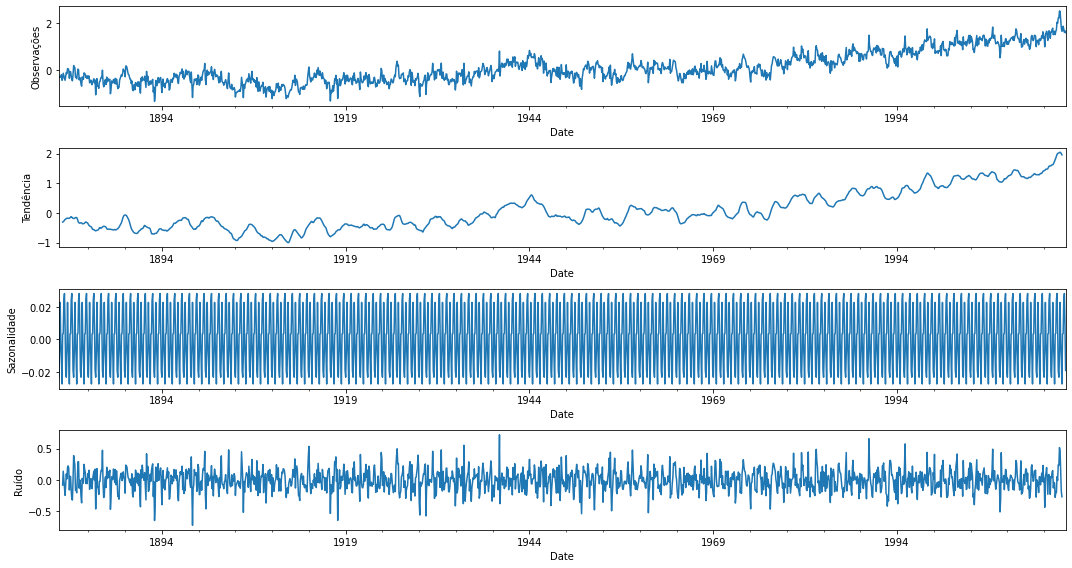

In [236]:
seasonplot = seasonal_decompose(df_temp)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, ylabel='Observações') 
seasonplot.trend.plot(ax=ax2, ylabel='Tendência') 
seasonplot.seasonal.plot(ax=ax3, ylabel='Sazonalidade')
seasonplot.resid.plot(ax=ax4, ylabel='Ruído') 
plt.tight_layout()

In [237]:
df_temp.dtypes

Temperature    float64
dtype: object

In [238]:
# criando df com sinal sintetico:

data_ruido=pd.DataFrame(sinal)
data_ruido

,0
0,4.693427
1,3.560453
2,6.616874
3,1.266794
4,6.100171
...,...
1639,6.067240
1640,6.297172
1641,7.864731
1642,5.954006


In [239]:
# Somando sinal aos dados de temperatura da series:
sinal_total= df_temp[['Temperature']].values + data_ruido
sinal_total

,0
0,4.394327
1,3.227553
2,6.301174
3,0.946894
4,5.886371
...,...
1639,7.947040
1640,8.043872
1641,9.483931
1642,7.634406


In [240]:
df_sinal=df_temp.drop('Temperature', axis=1)
df_sinal[['sinal']]=data_ruido.values

In [241]:
df_sinal_total=df_temp.drop('Temperature', axis=1)
df_sinal_total[['sinal_total']]=sinal_total.values

In [242]:
df_sinal

,sinal
Date,
1880-01-01,4.693427
1880-02-01,3.560453
1880-03-01,6.616874
1880-04-01,1.266794
1880-05-01,6.100171
...,...
2016-08-01,6.067240
2016-09-01,6.297172
2016-10-01,7.864731


In [243]:
df_sinal_total

,sinal_total
Date,
1880-01-01,4.394327
1880-02-01,3.227553
1880-03-01,6.301174
1880-04-01,0.946894
1880-05-01,5.886371
...,...
2016-08-01,7.947040
2016-09-01,8.043872
2016-10-01,9.483931


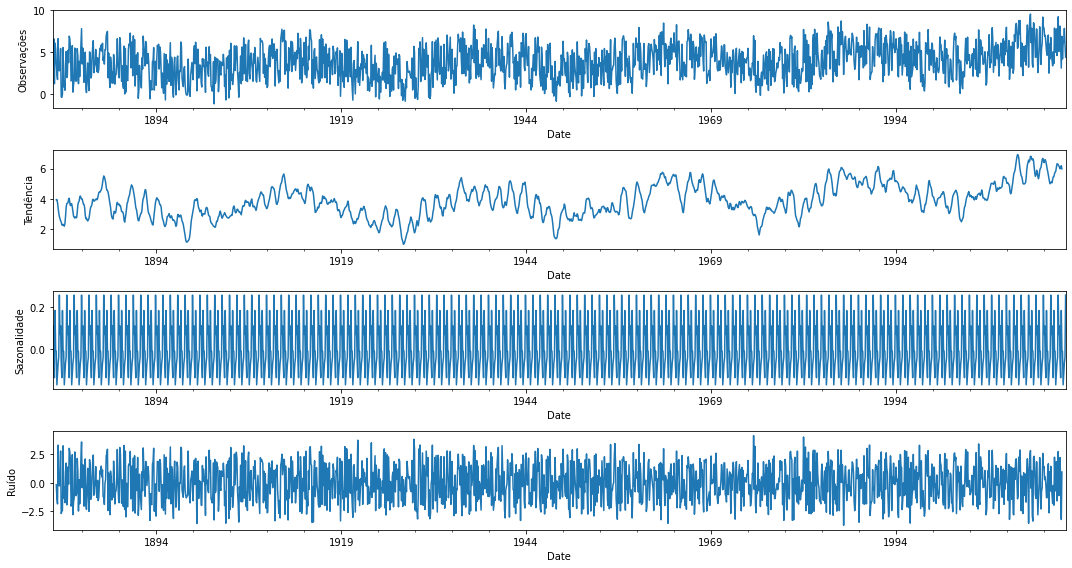

In [244]:
seasonplot = seasonal_decompose(df_sinal)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, ylabel='Observações') 
seasonplot.trend.plot(ax=ax2, ylabel='Tendência') 
seasonplot.seasonal.plot(ax=ax3, ylabel='Sazonalidade')
seasonplot.resid.plot(ax=ax4, ylabel='Ruído') 
plt.tight_layout()

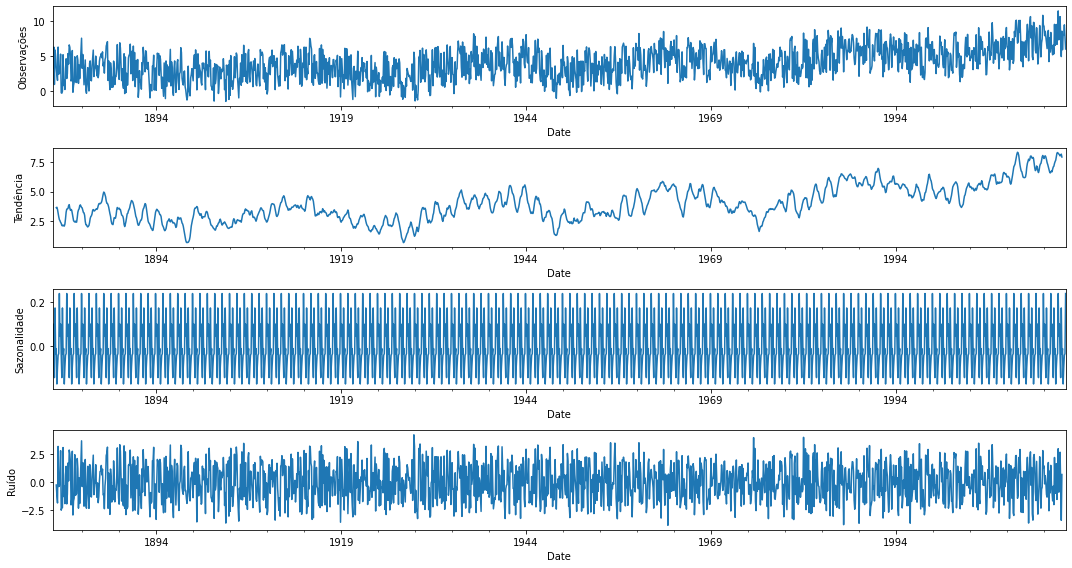

In [245]:
# 
seasonplot = seasonal_decompose(df_sinal_total)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, ylabel='Observações') 
seasonplot.trend.plot(ax=ax2, ylabel='Tendência') 
seasonplot.seasonal.plot(ax=ax3, ylabel='Sazonalidade')
seasonplot.resid.plot(ax=ax4, ylabel='Ruído') 
plt.tight_layout()

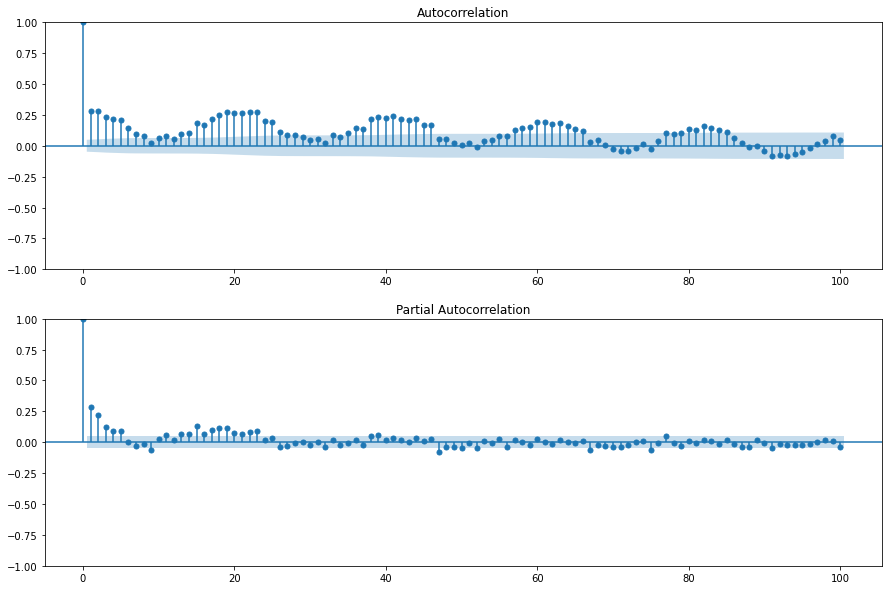

In [246]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_sinal.values.squeeze(), lags=100, ax=ax1)
sm.graphics.tsa.plot_pacf(df_sinal.values.squeeze(), lags= 100, ax=ax2, method='ywm')
plt.show()